In [112]:
import numpy as np
import seaborn as sns
import sklearn
import pandas as pd
import matplotlib.pyplot as plt

Загрузка таблицы. Удаление кат. данных

In [113]:
arr1 = np.random.randint(1, 40, 10000)
arr2 = np.random.randint(4, 90, 10000)
arr4 = np.abs(arr1 + arr2 + np.random.normal(np.random.randint(0, 4, 10000), 3.5, 10000)*3.1)
dataset = pd.DataFrame({'x': arr1, 'y': arr2, 'value': arr4})
dataset

,x,y,value
0,17,71,114.844078
1,21,32,54.167333
2,39,87,126.225365
3,13,4,21.261229
4,1,56,55.530728
...,...,...,...
9995,37,83,107.582723
9996,17,76,96.394153
9997,8,61,88.252662
9998,9,18,16.508278


Построение линейной регрессии

In [114]:
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection

trainset, testset = sklearn.model_selection.train_test_split(dataset)
linear_regression = sklearn.linear_model.LinearRegression()

linear_regression.fit(trainset[['x', 'y']].to_numpy(), trainset['value'].to_numpy())
linear_regression.score(testset[['x', 'y']].to_numpy(), testset['value'].to_numpy()), linear_regression.coef_

(0.8500931631388726, array([0.99711141, 0.98808391]))

Построение решения бустингом

In [115]:
import sklearn.ensemble


boosting = sklearn.ensemble.GradientBoostingRegressor()
boosting.fit(trainset[['x', 'y']].to_numpy(), trainset['value'].to_numpy())
boosting.score(testset[['x', 'y']].to_numpy(), testset['value'].to_numpy())

0.8454913176288785

Добавление и извлечение категориальных признаков (One-hot encoding)

In [116]:
import sklearn.preprocessing

def digits(x):
    if x < 10:
        return 'Ones'
    elif x >= 10 and x < 100:
        return 'Decimals'
    elif x >= 100:
        return 'Hundreds'

dataset['digits'] = dataset['value'].apply(lambda x: digits(x))
dataset = pd.get_dummies(dataset, columns=['digits'])
dataset

,x,y,value,digits_Decimals,digits_Hundreds,digits_Ones
0,17,71,114.844078,False,True,False
1,21,32,54.167333,True,False,False
2,39,87,126.225365,False,True,False
3,13,4,21.261229,True,False,False
4,1,56,55.530728,True,False,False
...,...,...,...,...,...,...
9995,37,83,107.582723,False,True,False
9996,17,76,96.394153,True,False,False
9997,8,61,88.252662,True,False,False
9998,9,18,16.508278,True,False,False


Обучаем новые регрессионные модели (One-hot encoding)

In [117]:
trainset, testset = sklearn.model_selection.train_test_split(dataset)
linear_regression = sklearn.linear_model.LinearRegression()

linear_regression.fit(trainset[['x', 'y', 'digits_Ones', 'digits_Decimals', 'digits_Hundreds']].to_numpy(), trainset['value'].to_numpy())
print('Linear Regression score is', linear_regression.score(testset[['x', 'y', 'digits_Ones', 'digits_Decimals', 'digits_Hundreds']].to_numpy(), testset['value'].to_numpy()))

boosting = sklearn.ensemble.GradientBoostingRegressor()
boosting.fit(trainset[['x', 'y', 'digits_Ones', 'digits_Decimals', 'digits_Hundreds']].to_numpy(), trainset['value'].to_numpy())
print('Gradient Boosting score is', boosting.score(testset[['x', 'y', 'digits_Ones', 'digits_Decimals', 'digits_Hundreds']].to_numpy(), testset['value'].to_numpy()))
linear_regression.coef_

Linear Regression score is 0.8781246143747893
Gradient Boosting score is 0.8828231548297417


array([  0.83525583,   0.85050394, -19.13390418,   2.27047466,
        16.86342951])

Добавление и извлечение категориальных признаков (target encoding)

In [118]:
def target_encoding(x):
    if x == 'Ones':
        return dataset[dataset['digits'] == 'Ones']['value'].mean()
    elif x == 'Decimals':
        return dataset[dataset['digits'] == 'Decimals']['value'].mean()
    elif x == 'Hundreds':
        return dataset[dataset['digits'] == 'Hundreds']['value'].mean()

dataset = dataset.drop(['digits_Ones', 'digits_Decimals', 'digits_Hundreds'], axis=1)
dataset['digits'] = dataset['value'].apply(lambda x: digits(x))
dataset['digits'] = dataset['digits'].apply(lambda x: target_encoding(x))
dataset

,x,y,value,digits
0,17,71,114.844078,113.667176
1,21,32,54.167333,62.167095
2,39,87,126.225365,113.667176
3,13,4,21.261229,62.167095
4,1,56,55.530728,62.167095
...,...,...,...,...
9995,37,83,107.582723,113.667176
9996,17,76,96.394153,62.167095
9997,8,61,88.252662,62.167095
9998,9,18,16.508278,62.167095


Обучаем новые регрессионные модели (Target Encoding)

In [119]:
trainset, testset = sklearn.model_selection.train_test_split(dataset)
linear_regression = sklearn.linear_model.LinearRegression()

linear_regression.fit(trainset[['x', 'y', 'digits']].to_numpy(), trainset['value'].to_numpy())
print('Linear Regression score is', linear_regression.score(testset[['x', 'y', 'digits']].to_numpy(), testset['value'].to_numpy()))

boosting = sklearn.ensemble.GradientBoostingRegressor()
boosting.fit(trainset[['x', 'y', 'digits']].to_numpy(), trainset['value'].to_numpy())
print('Gradient Boosting score is', boosting.score(testset[['x', 'y', 'digits']].to_numpy(), testset['value'].to_numpy()))
linear_regression.coef_

Linear Regression score is 0.8797566001462273
Gradient Boosting score is 0.8877041769204665


array([0.83382012, 0.84375865, 0.29891537])

Визуализация данных в пространстве главных компонент

[[ 7.90627906e-01 -6.10986042e-01  1.04997424e-02  3.65438350e-02
  -1.23727756e-02  2.16486520e-03  3.19438752e-04 -4.80429199e-06]
 [ 6.11962054e-01  7.90606093e-01 -1.42996813e-05 -1.75332031e-02
   1.08925910e-02 -4.28353467e-03 -2.01736117e-04  1.66044668e-06]]


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

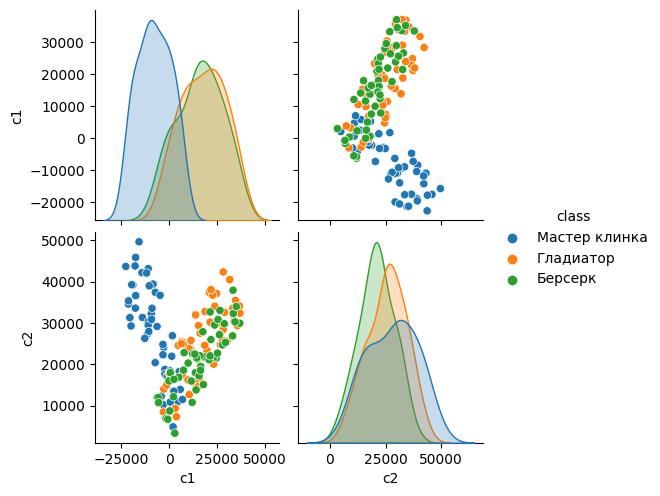

In [178]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(2)
dataset = pd.read_csv('warrior_subclasses_dataset.csv', index_col='Unnamed: 0')
pca.fit(dataset[dataset.columns[1:]].to_numpy())
print(pca.components_)

features_pca = dataset[dataset.columns[1:]].to_numpy().dot(pca.components_.T)
df = pd.DataFrame({'c1': features_pca[:, 0], 'c2': features_pca[:, 1]})
dataset = pd.concat([dataset['class'].reset_index(drop=True), df.reset_index(drop=True)], axis=1)

sns.pairplot(dataset, hue='class')